### Analyzing random and clustered distributions using Ripley's K function 

Using Sci Py and Astropy to simulate a random and clustered spatial point pattern that can be analyzed using Ripley's K function. 

Pedro Vallejo Ramirez
2020 05 22
References: 
* Ripley's K: https://docs.astropy.org/en/stable/stats/ripley.html
* Simulating random array of points: https://hpaulkeeler.com/poisson-point-process-simulation/
* Making blobs: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [150]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.stats import RipleysKEstimator
from sklearn.datasets import make_blobs

%config InlineBackend.figure_format = 'retina'

# create random sample of points from a uniform distribution 
z = np.random.uniform(low=5, high=10, size=(100, 2))
Kest = RipleysKEstimator(area=25, x_max=10, y_max=10, x_min=5, y_min=5)

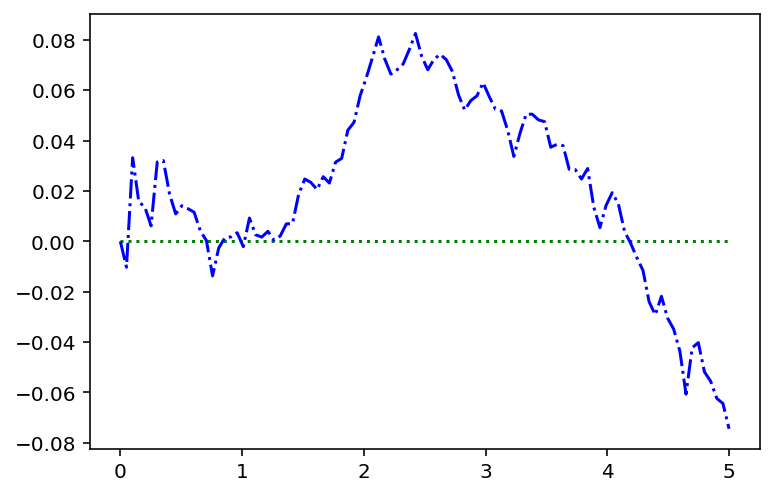

In [151]:
# test Ripley's K with this distribution (and different edge effects available)

r = np.linspace(0,5, 100)
def l_func(x,r):
    return (np.sqrt(x/np.pi)-r)

# testing Ripley's K function with different forms of edge correction
plt.plot(r, l_func(Kest.poisson(r),r), color='green', ls=':', label=r'$K_{pois}$')
#plt.plot(r, l_func(Kest(data=z, radii=r, mode='none'),r), color='red', ls='--',label=r'$K_{un}$')
#plt.plot(r, l_func(Kest(data=z, radii=r, mode='translation'),r), color='black',label=r'$K_{trans}$')
plt.plot(r, l_func(Kest(data=z, radii=r, mode='ohser'),r), color='blue', ls='-.',label=r'$K_{ohser}$')
#plt.plot(r, l_func(Kest(data=z, radii=r, mode='var-width'),r), color='green',label=r'$K_{var-width}$')
#plt.plot(r, l_func(Kest(data=z, radii=r, mode='ripley'),r), color='yellow',label=r'$K_{ripley}$')

(0, 3)

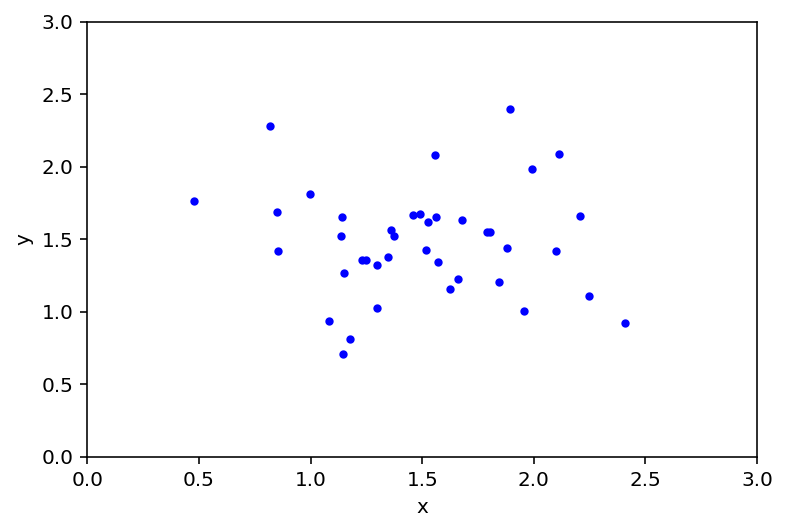

In [218]:
# Generate sample poisson and clustered data to test Ripley's K function

# Clustered blob
centers = [[1.5, 1.5]]
X, labels_true = make_blobs(n_samples=40, centers=centers, cluster_std=0.4,random_state=0)

plt.scatter(X[:,0],X[:,1],s=10,c= 'blue')
plt.xlabel('x')
plt.ylabel('y')
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,3])


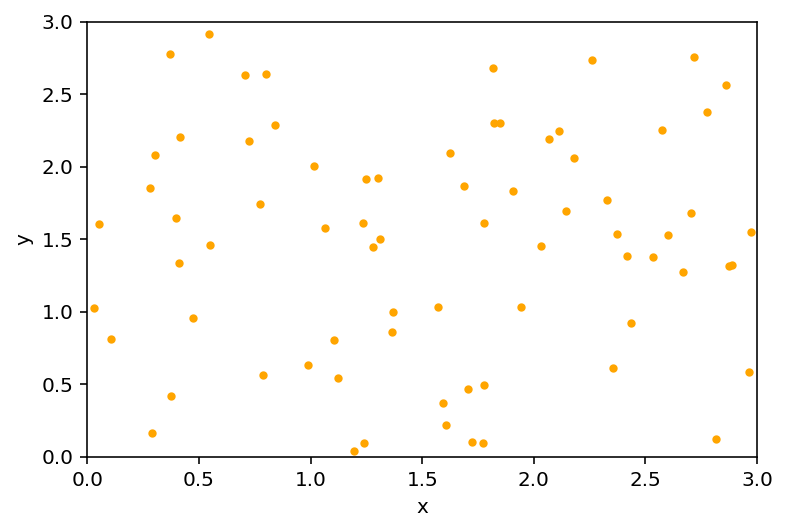

In [216]:
# Simulate random array of points
# source: https://hpaulkeeler.com/poisson-point-process-simulation/

#Simulation window parameters
xMin=0;xMax=3;
yMin=0;yMax=3;
xDelta=xMax-xMin;yDelta=yMax-yMin; #rectangle dimensions
areaTotal=xDelta*yDelta;
 
#Point process parameters
lambda0=10; #intensity (ie mean density) of the Poisson process
 
#Simulate Poisson point process
numbPoints = scipy.stats.poisson( lambda0*areaTotal ).rvs()#Poisson number of points
xx = xDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+xMin#x coordinates of Poisson points
yy = yDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+yMin#y coordinates of Poisson points
#Plotting
plt.scatter(xx,yy,s=10,c='orange')
plt.xlabel("x"); plt.ylabel("y")
axes = plt.gca()
axes.set_xlim([0,xMax])
axes.set_ylim([0,yMax])

n = len(xx)
Z = np.zeros((n,2))
Z[:,0] = np.ravel(xx)
Z[:,1] = np.ravel(yy)



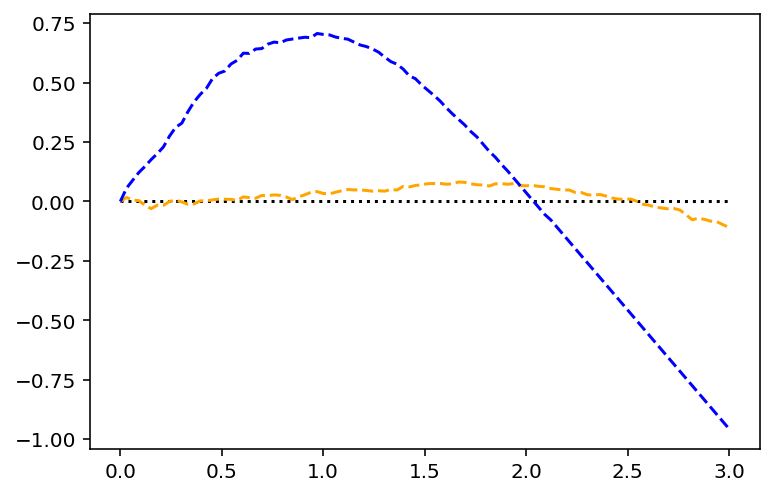

In [220]:
# create estimator
Kest2 = RipleysKEstimator(area=9, x_max=3, y_max=3, x_min=0, y_min=0)

# define search radius
r = np.linspace(0, 3, 100)

plt.plot(r, l_func(Kest2.poisson(r),r), color='black', ls=':', label=r'$K_{pois}$')
plt.plot(r, l_func(Kest2(data=Z, radii=r, mode='ohser'),r), color='orange', ls='--',label=r'$K_{un}$')
plt.plot(r, l_func(Kest2(data=X, radii=r, mode='ohser'),r), color='blue', ls='--',label=r'$K_{un}$')


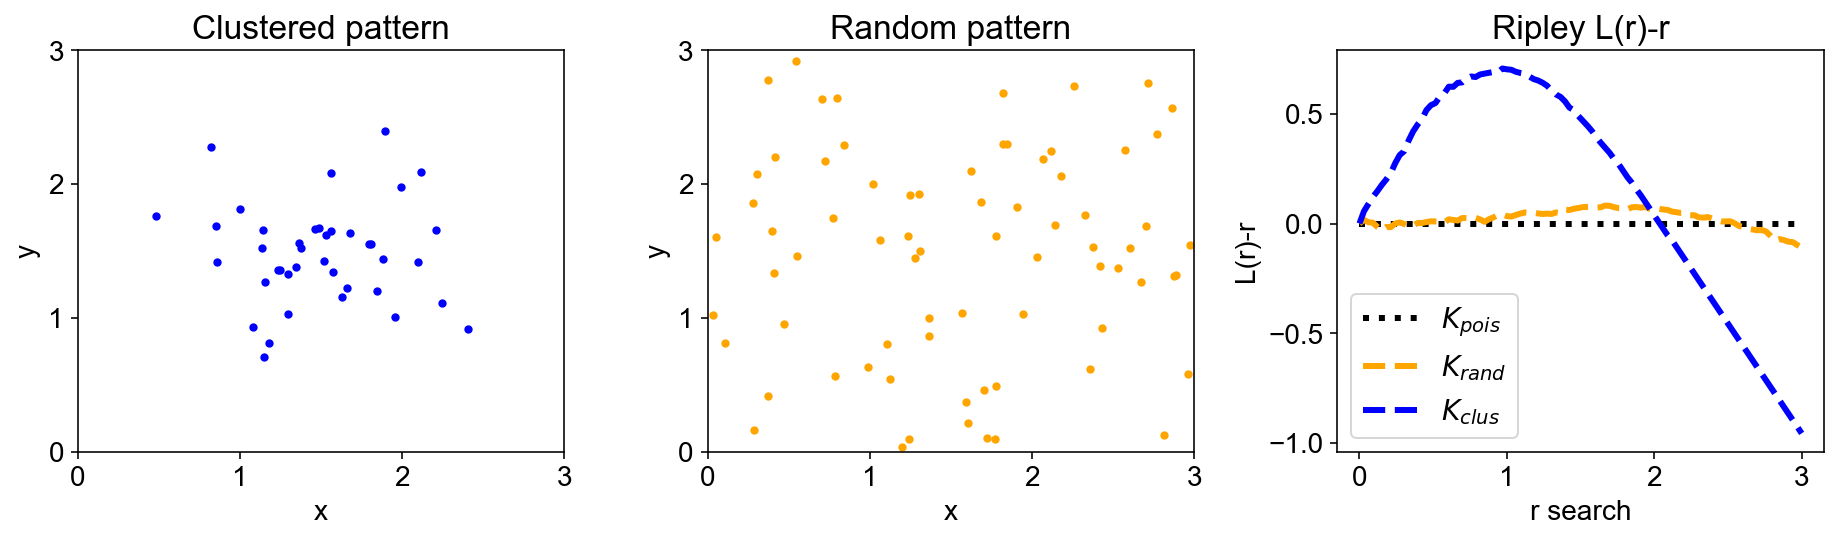

In [267]:
# plot all three in the same figure
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "Arial"

fig, ax = plt.subplots(1,3,figsize = (13,4))
ax[0].scatter(X[:,0],X[:,1],s=10,c= 'blue')
ax[0].set_title('Clustered pattern')
ax[1].scatter(xx,yy,s=10,c='orange')
ax[1].set_title('Random pattern')

ax[1].set_xlabel("x"); ax[1].set_ylabel("y")
ax[0].set_xlabel("x"); ax[0].set_ylabel("y")

# set limits equal for both patterns
ax[0].set_xlim([0,xMax])
ax[0].set_ylim([0,yMax])
ax[1].set_xlim([0,xMax])
ax[1].set_ylim([0,yMax])

ax[0].locator_params(axis='y', nbins=4)
ax[0].locator_params(axis='x', nbins=4)
ax[1].locator_params(axis='y', nbins=4)
ax[1].locator_params(axis='x', nbins=4)


ax[2].plot(r, l_func(Kest2.poisson(r),r), color='black', ls=':', linewidth=3,label=r'$K_{pois}$')
ax[2].plot(r, l_func(Kest2(data=Z, radii=r, mode='ohser'),r), linewidth=3,color='orange', ls='--',label=r'$K_{rand}$')
ax[2].plot(r, l_func(Kest2(data=X, radii=r, mode='ohser'),r),linewidth=3, color='blue', ls='--',label=r'$K_{clus}$')
ax[2].legend()
ax[2].set_xlabel("r search"); ax[2].set_ylabel("L(r)-r")
ax[2].set_title('Ripley L(r)-r')

ax[2].locator_params(axis='y', nbins=4)
ax[2].locator_params(axis='x', nbins=4)


plt.tight_layout()



### Voronoi tessellation to analyze cluster


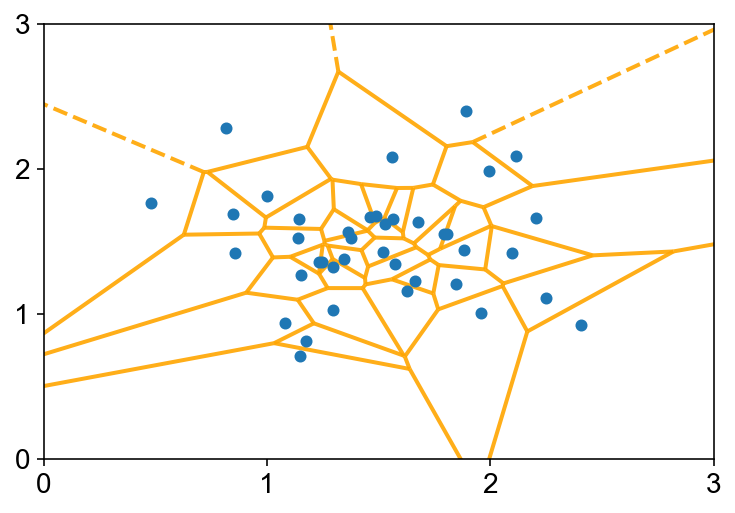

In [286]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# compute voronoi tessellation for clustered pattern

vor_cluster1 = Voronoi(X)

fig = voronoi_plot_2d(vor_cluster1,show_vertices=False, line_colors='orange',
                      line_width=2, line_alpha=0.9, point_size=10, point_alpha = 0.5)

plt.xlim([0,xMax])
plt.ylim([0,yMax])

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.show()




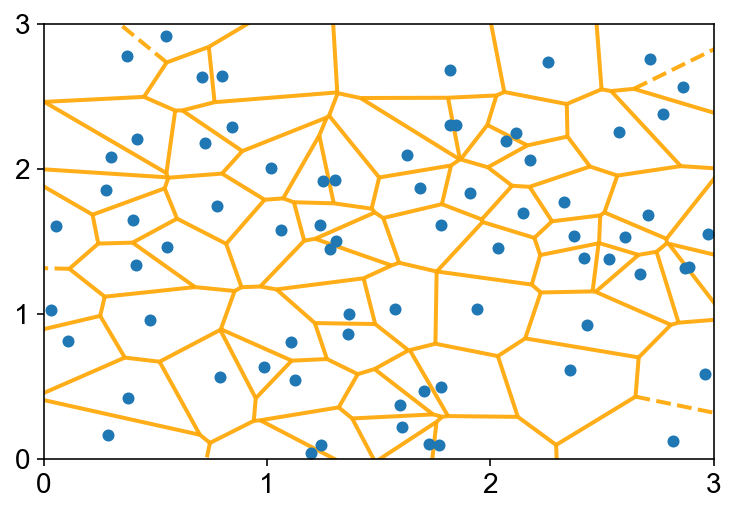

In [287]:
# for the random poisson distribution
vor_cluster2 = Voronoi(Z)

fig = voronoi_plot_2d(vor_cluster2,show_vertices=False, line_colors='orange',
                      line_width=2, line_alpha=0.9, point_size=10, point_alpha = 0.5)
plt.xlim([0,xMax])
plt.ylim([0,yMax])

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.show()
plt.show()

In [284]:
# show in the same plot with the same axes
